In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import  os 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [9]:
train_dir=r'C:\Users\Vishwajeet kumar\Desktop\project_V01\train'
validation_dir=r'C:\Users\Vishwajeet kumar\Desktop\project_V01\test'
test_dir=r'C:\Users\Vishwajeet kumar\Desktop\project_V01\validation'

Data preprocessing
#Read the picture file 
#Decode the JPEG content to RGB grid of point 
#convert these into floating point tensors.
#Rescale the pixel values(between 0  and 255) to the [0,1] intervals



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# genrating the batches of image genrator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size= 20,
                class_mode='binary')

Found 2000 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary' )

Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
model = models.Sequential() 
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer= optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

C:\Users\Vishwajeet kumar\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
history= model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=20,
            validation_data=validation_generator,
            validation_steps= 50)

C:\Users\Vishwajeet kumar\AppData\Local\Temp\ipykernel_5920\3915790038.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(


Epoch 1/20
100/100 [==============================] - 269s 3s/step - loss: 0.6903 - acc: 0.5440 - val_loss: 0.6785 - val_acc: 0.5810
Epoch 2/20
100/100 [==============================] - 293s 3s/step - loss: 0.6590 - acc: 0.6065 - val_loss: 0.6543 - val_acc: 0.6180
Epoch 3/20
100/100 [==============================] - 251s 3s/step - loss: 0.6114 - acc: 0.6715 - val_loss: 0.6078 - val_acc: 0.6850
Epoch 4/20
100/100 [==============================] - 306s 3s/step - loss: 0.5656 - acc: 0.7085 - val_loss: 0.5911 - val_acc: 0.6790
Epoch 5/20
100/100 [==============================] - 278s 3s/step - loss: 0.5339 - acc: 0.7285 - val_loss: 0.6113 - val_acc: 0.6580
Epoch 6/20
100/100 [==============================] - 306s 3s/step - loss: 0.5030 - acc: 0.7570 - val_loss: 0.5679 - val_acc: 0.7000
Epoch 7/20
100/100 [==============================] - 395s 4s/step - loss: 0.4829 - acc: 0.7600 - val_loss: 0.5657 - val_acc: 0.7030
Epoch 8/20
100/100 [==============================] - 358s 4s/step - 

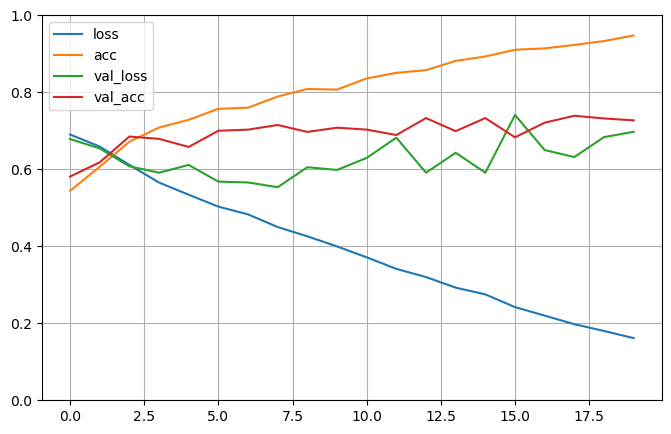

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
model.save("model.h5")

# Data augmentation Preprocessing


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    
    )


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator= train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size= 32,
                class_mode= 'binary')

validation_generator= test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


creating artitecture


In [11]:
model= models.Sequential()

NameError: name 'models' is not defined

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [19]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer= optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

C:\Users\Vishwajeet kumar\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
history= model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\Vishwajeet kumar\AppData\Local\Temp\ipykernel_2572\1933666326.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(


Epoch 1/100
100/100 [==============================] - 250s 2s/step - loss: 0.6918 - acc: 0.5200 - val_loss: 0.6917 - val_acc: 0.5000


In [23]:
model.save("project_cnn.h5")

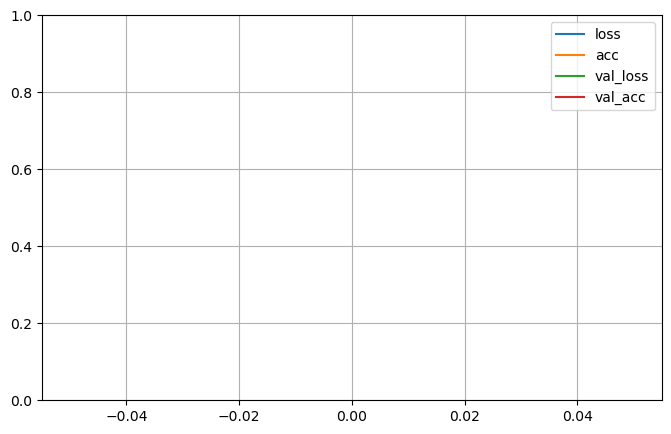

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()